In [90]:
!pip install --upgrade pip
!pip install -r ../requirements.txt

In [91]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
from pylab import rcParams

In [146]:
cpu_train_a = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-train-a.csv')
cpu_test_a = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-test-a.csv')

cpu_train_b = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-train-b.csv')
cpu_test_b = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-test-b.csv')

In [143]:
cpu_train_a.to_csv('/workspace/Time-Series-Project/data/processed/cpu_train_a.csv')
cpu_train_b.to_csv('/workspace/Time-Series-Project/data/processed/cpu_train_b.csv')

In [144]:
cpu_train_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  420 non-null    object 
 1   cpu       420 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.7+ KB


In [94]:
cpu_train_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  600 non-null    object 
 1   cpu       600 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.5+ KB


In [95]:
cpu_test_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  60 non-null     object 
 1   cpu       60 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [96]:
cpu_test_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  60 non-null     object 
 1   cpu       60 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [97]:
cpu_train_a.head()

,datetime,cpu
0,2017-01-27 18:42:00,1.14
1,2017-01-27 18:43:00,1.10
2,2017-01-27 18:44:00,1.09
3,2017-01-27 18:45:00,1.08
4,2017-01-27 18:46:00,1.08


In [98]:
cpu_train_b.head()

,datetime,cpu
0,2017-01-27 18:42:00,1.14
1,2017-01-27 18:43:00,1.10
2,2017-01-27 18:44:00,1.09
3,2017-01-27 18:45:00,1.08
4,2017-01-27 18:46:00,1.08


In [150]:
# Converting to datetime type

cpu_train_a['datetime'] = pd.to_datetime(cpu_train_a['datetime'])
cpu_train_b['datetime'] = pd.to_datetime(cpu_train_b['datetime'])

cpu_test_a['datetime'] = pd.to_datetime(cpu_test_a['datetime'])
cpu_test_b['datetime'] = pd.to_datetime(cpu_test_b['datetime'])

In [151]:
#Convert the dataframe index to a datetime index 

cpu_train_a = cpu_train_a.set_index('datetime')
cpu_train_b = cpu_train_b.set_index('datetime')

cpu_test_a = cpu_test_a.set_index('datetime')
cpu_test_b = cpu_test_b.set_index('datetime')

In [101]:
cpu_train_a.head()

,cpu
datetime,
2017-01-27 18:42:00,1.14
2017-01-27 18:43:00,1.10
2017-01-27 18:44:00,1.09
2017-01-27 18:45:00,1.08
2017-01-27 18:46:00,1.08


In [141]:
cpu_train_a.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420 entries, 2017-01-27 18:42:00 to 2017-01-28 01:41:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cpu     420 non-null    float64
dtypes: float64(1)
memory usage: 6.6 KB


#### Explore data

In [102]:
# CPU data analysis

cpu_train_a.describe()

,cpu
count,420.000000
mean,1.233262
std,0.505668
min,0.570000
25%,0.787500
50%,1.110000
75%,1.582500
max,2.550000


In [103]:
cpu_train_b.describe()

,cpu
count,600.000000
mean,1.282733
std,0.484951
min,0.570000
25%,0.840000
50%,1.240000
75%,1.610000
max,2.550000


In [104]:
# 2.55 GHz max frecuency

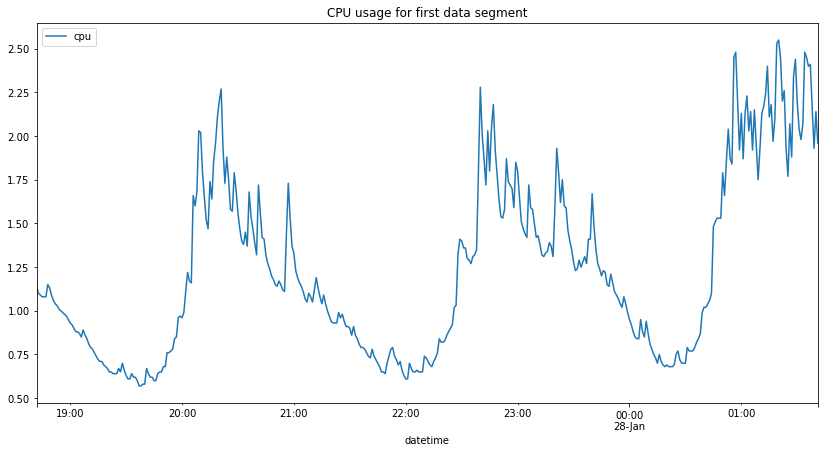

In [105]:
cpu_train_a.plot(title = 'CPU usage for first data segment', figsize = (14,7))
plt.show()

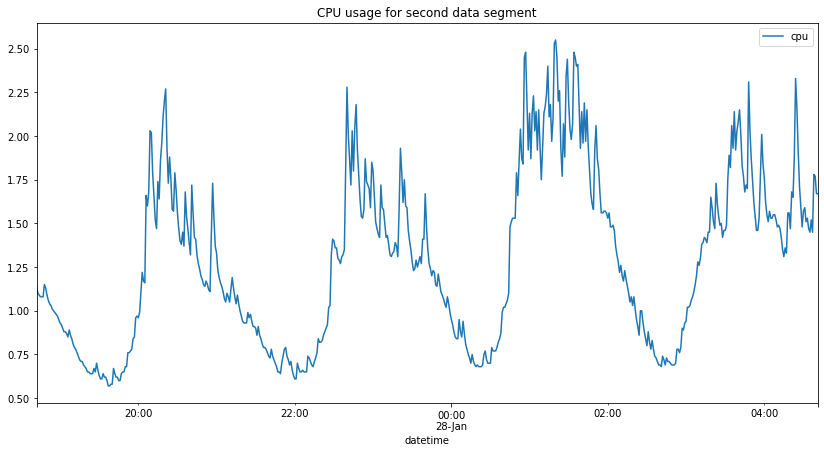

In [106]:
cpu_train_b.plot(title = 'CPU usage for second data segment', figsize = (14,7))
plt.show()

#### Analysis of first data segment

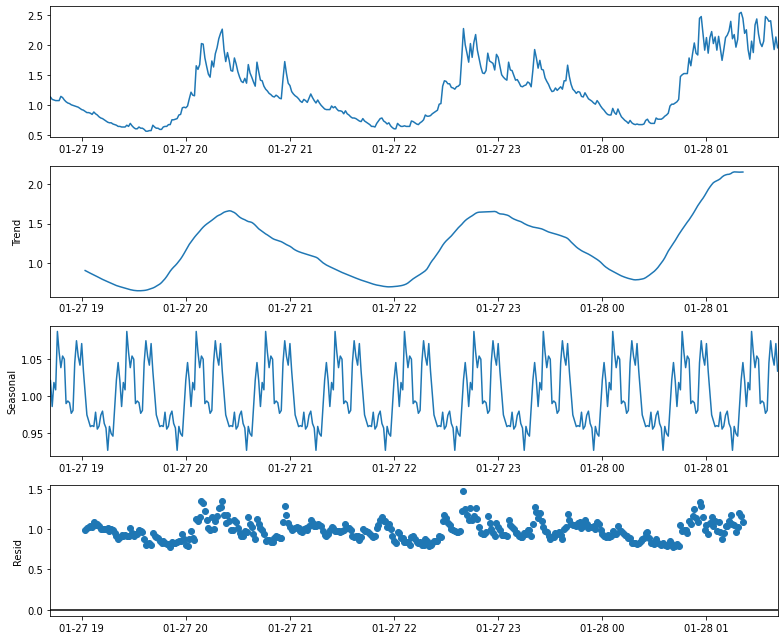

In [107]:
# Decomposition of variations components (There are 4 variation categories: Seasonal, Cyclic, Trend, and Irregular fluctuations)

rcParams['figure.figsize'] = 11, 9
decomposition = seasonal_decompose(cpu_train_a, model='multiplicative', period = 40)
fig = decomposition.plot()
plt.show()

In [108]:
# Finding the best combination of parameters for the best model, established by AIC

stepwise_model_a = auto_arima(cpu_train_a, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model_a.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=3.33 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-273.302, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-368.085, Time=0.42 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.59 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-271.465, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-417.827, Time=1.61 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=13.78 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=3.91 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-419.762, Time=2.80 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-369.850, Time=0.31 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=8.09 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=3.90 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=-417.860, Time=2.18 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=-421.259, Time=4.12 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=-373.

In [109]:
# It saves the best parameters found in the Grid Search

stepwise_model_a.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (3, 1, 2),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (2, 1, 0, 12),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': False}

In [110]:
# Model AIC

stepwise_model_a.aic()

-437.41198834580103

In [111]:
stepwise_model_a.fit(cpu_train_a)

ARIMA(order=(3, 1, 2), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

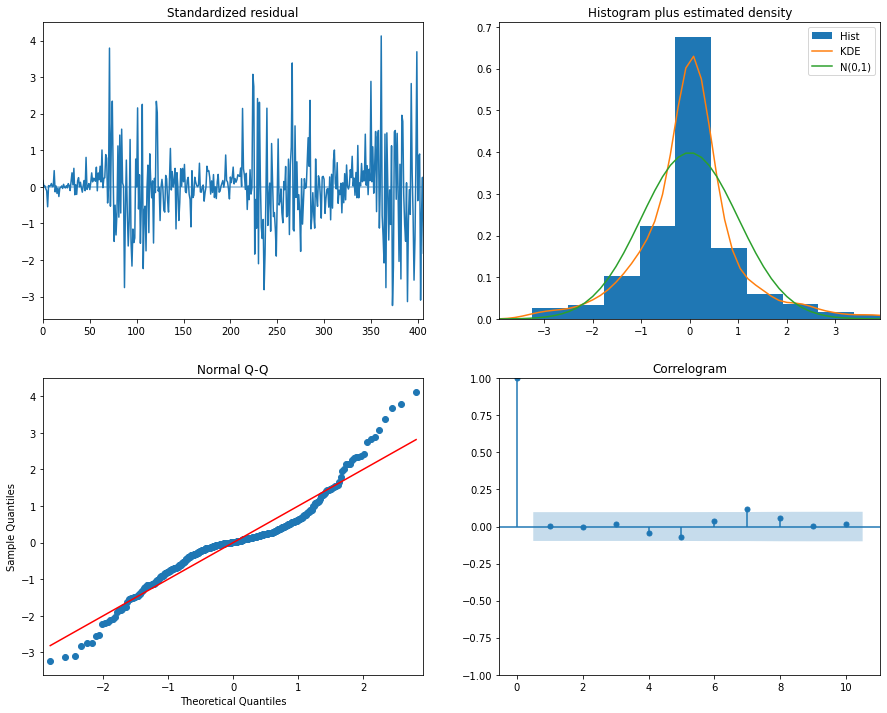

In [112]:
# run model diagnostics

stepwise_model_a.plot_diagnostics(figsize=(15, 12))
plt.show()

####  Model diagnostics

This is to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean. If the seasonal ARIMA model does not satisfy these properties, it is a good indication that it can be further improved.

In the top right plot, the orange KDE line should follow closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). This is a good indication that the residuals are normally distributed. In this case the KDE line is not so similar as the N(0,1) line.

The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) should follow the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed. As well, we can see that the blue dots do not follow so good the linear trend.

In [113]:
# Run the actual prediction by using the most recent 100 observed data points being followed by the 60 predicted points

last_100_a = cpu_train_a.tail(100)
last_100_a.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2017-01-28 00:02:00 to 2017-01-28 01:41:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cpu     100 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


In [114]:
for_pred1 = pd.concat([last_100_a, cpu_test_a], axis = 0)
for_pred1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 160 entries, 2017-01-28 00:02:00 to 2017-01-28 02:41:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cpu     160 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB


<AxesSubplot:xlabel='datetime'>

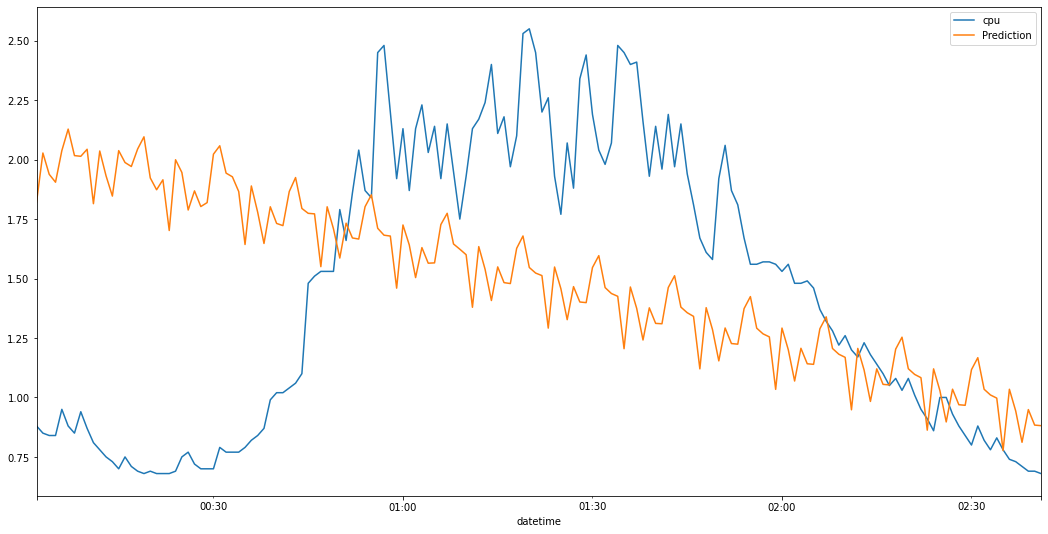

In [115]:
# Predictions

future_forecast_a = stepwise_model_a.predict(n_periods = 160)
future_forecast_a = pd.DataFrame(future_forecast_a, index = for_pred1.index, columns = ['Prediction'])
pd.concat([for_pred1, future_forecast_a], axis = 1).plot(figsize = (18,9))

It seems that the cpu usage in the test part is very different from the tendency that we predicted. Between aproximately 1am and 2am the computer is very busy

#### Analysis of second data segment

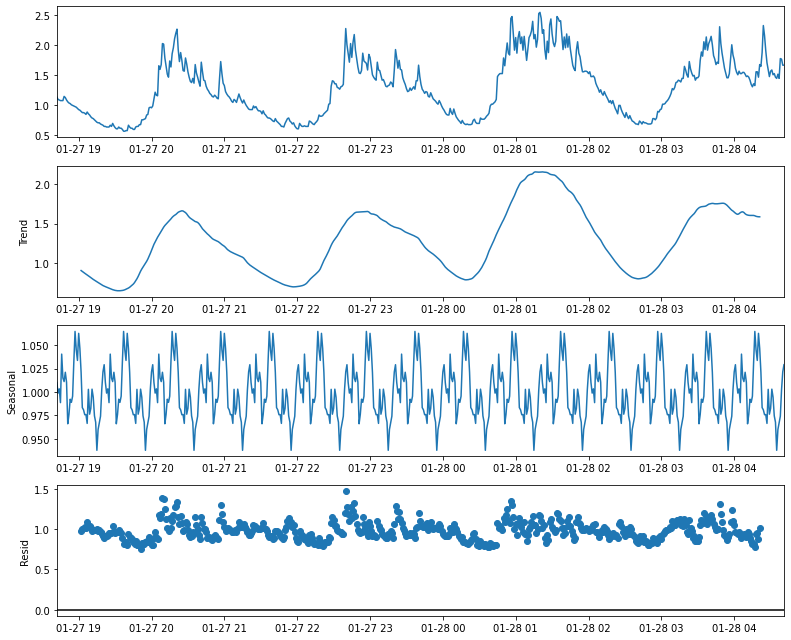

In [116]:
rcParams['figure.figsize'] = 11, 9
decomposition = seasonal_decompose(cpu_train_b, model='multiplicative', period = 40)
fig = decomposition.plot()
plt.show()

In [117]:
stepwise_model_b = auto_arima(cpu_train_b, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model_b.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=5.49 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-376.973, Time=0.17 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-540.238, Time=0.41 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=4.68 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-375.034, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-618.341, Time=2.71 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=14.78 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=5.31 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-619.706, Time=1.79 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-541.973, Time=0.39 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=9.22 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=2.81 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=-618.493, Time=2.26 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=10.83 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=-617.729,

In [118]:
stepwise_model_b.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (0, 1, 0),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (2, 1, 0, 12),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': False}

In [119]:
stepwise_model_b.aic()

-619.7055322347649

In [120]:
stepwise_model_b.fit(cpu_train_b)

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

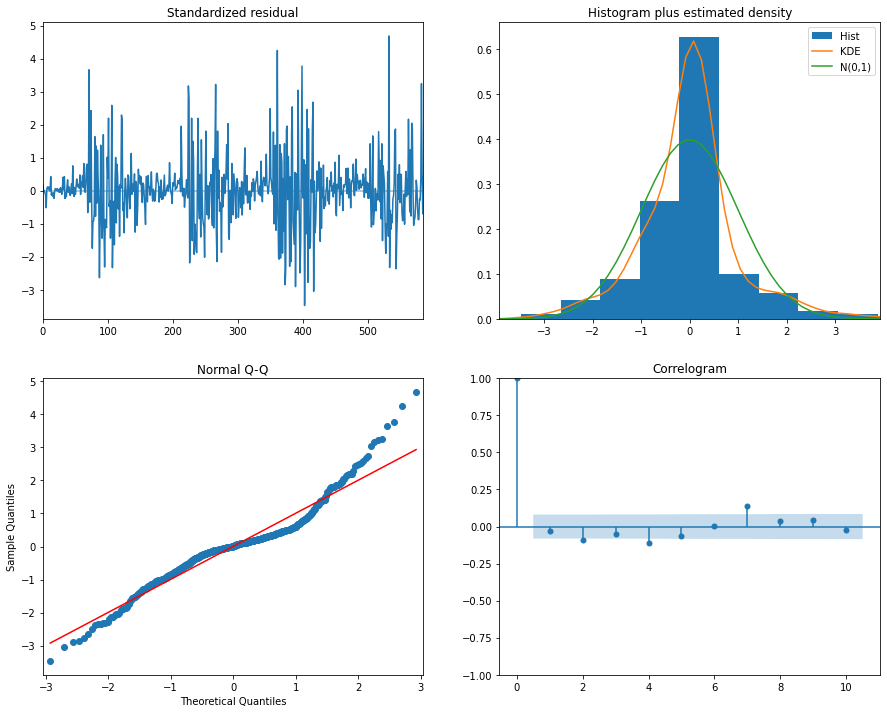

In [121]:
stepwise_model_b.plot_diagnostics(figsize=(15, 12))
plt.show()

In [122]:
last_100_b = cpu_train_b.tail(100)
last_100_b.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2017-01-28 03:02:00 to 2017-01-28 04:41:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cpu     100 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


In [123]:
for_pred2 = pd.concat([last_100_b, cpu_test_b], axis = 0)
for_pred2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 160 entries, 2017-01-28 03:02:00 to 2017-01-28 05:41:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cpu     160 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB


<AxesSubplot:xlabel='datetime'>

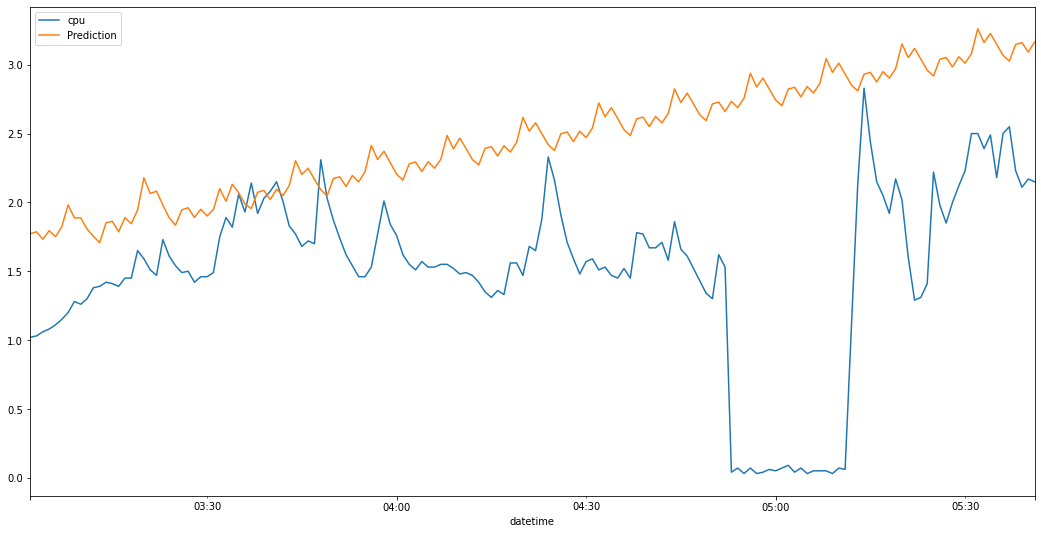

In [124]:
future_forecast_b = stepwise_model_b.predict(n_periods = 160)
future_forecast_b = pd.DataFrame(future_forecast_b, index = for_pred2.index, columns = ['Prediction'])

pd.concat([for_pred2, future_forecast_b], axis = 1).plot(figsize = (18,9))

Definetly we can appreciate an anormal cpu usage at 2017-01-28 around 5am, it could be when the computer is not running anything or it is super optimzed fr cpu usage. Also could be due to sleep mode. When it continues operating, there is a peak in usage.
It is interesting to see that the prediction does not have ways to know that there is a cap in the cpu usage because of hardware limitations.

The usage of the cpu is very 

(https://www.tenforums.com/performance-maintenance/129741-zero-cpu-utilization.html)
(https://docs.microsoft.com/en-us/windows-hardware/drivers/kernel/system-sleeping-states?redirectedfrom=MSDN)
